#  **Plant Health Monitoring - Data visualization**

This notebook visualizes the encoded plant health dataset.
Visualizations are divided into two categories:
1. Feature Engineering Validation: First section discusses ones that are critical for validating the claimed 
Hypotheses.They also serve the purpose of comparison between "Before" and 
"After" feature engineering.

2. Broader Context Analysis: Second section shows the visualizations in a Broader context, starting from analyzing the 
raw data -> Level 1 encoding -> Level 2 encoding

P.S. The remainder visualizations discussed in ETL pipeline hold good significance
as well. The idea of creating a separate notebook is organizing this section better.

In [2]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\baner\\OneDrive\\Documenti\\data_analytics_AI\\assessment_uno\\Final\\plant_health-monitor\\plant_health-monitor\\jupyter_notebooks'

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [4]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\baner\\OneDrive\\Documenti\\data_analytics_AI\\assessment_uno\\Final\\plant_health-monitor\\plant_health-monitor'

In [ ]:
# ---
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set paths
raw_path = "data/raw/plant_moniter_health_data.csv"
cleaned_path = "data/cleaned/plant_moniter_health_data_cleaned.csv"
encoded_path1 = "data/encoded/plant_health_cleaned_level1.csv"
encoded_path2 = "data/encoded/plant_health_cleaned_level2.csv"

# Ensure directories exist
os.makedirs(os.path.dirname(raw_path), exist_ok=True)
os.makedirs(os.path.dirname(cleaned_path), exist_ok=True)

# Load datasets
level1_df = pd.read_csv(encoded_path1)
level2_df = pd.read_csv(encoded_path2)

# ---

In [6]:
level1_df.head(10)


,Plant_ID,Temperature_C,Humidity_%,Soil_Moisture_%,Soil_pH,Nutrient_Level,Light_Intensity_lux,Health_Score,Health_Status,Soil_Moisture,...,Light_Stress,Nutrient_Stress,Total_Stress_L1a,Disease_Presence,Pest_Infestation,Abiotic_Stress_Score,Biotic_Stress_Score,Total_Stress_L1b,Dominant_Stress_Type,Stress_Category
0,Plant_1,26.490142,73.993554,34.872326,5.546096,41.365064,18728.720954,68.859186,0,0.348723,...,0,0,1,0,0,1,0,1,Abiotic,Abiotic-only
1,Plant_2,24.585207,69.246337,42.832220,6.069807,49.687965,18639.757675,73.690692,1,0.428322,...,0,0,0,0,0,0,0,0,NaN,No-Stress
2,Plant_3,26.943066,60.596304,33.113701,6.293197,50.180169,14613.070482,70.579398,1,0.331137,...,0,0,0,0,0,0,0,0,NaN,No-Stress
3,Plant_4,29.569090,53.530632,40.380577,7.443844,54.726303,19009.729425,74.520042,1,0.403806,...,0,0,1,0,0,1,0,1,Abiotic,Abiotic-only
4,Plant_5,24.297540,66.982233,16.595780,6.778277,36.331416,22198.487245,77.858497,1,0.165958,...,0,0,1,0,0,1,0,1,Abiotic,Abiotic-only
5,Plant_6,24.297589,63.934854,48.199406,5.832259,55.925673,16177.303643,88.371545,1,0.481994,...,0,0,1,0,0,1,0,1,Abiotic,Abiotic-only
6,Plant_7,29.737638,68.951932,45.018082,6.743018,22.956084,23145.447953,76.788410,1,0.450181,...,0,1,1,0,1,1,1,2,Combined,Combined
7,Plant_8,27.302304,66.351718,32.743671,5.726348,43.701154,21463.324463,64.143743,0,0.327437,...,0,0,1,0,0,1,0,1,Abiotic,Abiotic-only
8,Plant_9,23.591577,70.495527,54.888685,7.041346,45.117262,17797.300034,91.400678,1,0.548887,...,0,0,1,1,0,1,1,2,Combined,Combined
9,Plant_10,26.627680,54.647648,59.063552,6.264438,56.333268,19575.411088,71.629099,1,0.590636,...,0,0,0,0,0,0,0,0,NaN,No-Stress


In [7]:
level2_df.head(10)

,Plant_ID,Temperature_C,Humidity_%,Soil_Moisture_%,Soil_pH,Nutrient_Level,Light_Intensity_lux,Health_Score,Health_Status,Moisture_Zone,...,Moisture_Zone_Stress,Temperature_Zone_Stress,Humidity_Zone_Stress,Light_Zone_Stress,Abiotic_Stress_Score_L2,Disease_Presence,Pest_Infestation,Biotic_Stress_Score_L2,Total_Stress_Score_L2,Stress_Category
0,Plant_1,26.490142,73.993554,34.872326,5.546096,41.365064,18728.720954,68.859186,0,Optimal,...,0,0,1,0,1,0,0,0,1,Abiotic-only
1,Plant_2,24.585207,69.246337,42.832220,6.069807,49.687965,18639.757675,73.690692,1,Optimal,...,0,0,0,0,0,0,0,0,0,No-Stress
2,Plant_3,26.943066,60.596304,33.113701,6.293197,50.180169,14613.070482,70.579398,1,Optimal,...,0,0,0,1,1,0,0,0,1,Abiotic-only
3,Plant_4,29.569090,53.530632,40.380577,7.443844,54.726303,19009.729425,74.520042,1,Optimal,...,0,0,0,0,0,0,0,0,0,No-Stress
4,Plant_5,24.297540,66.982233,16.595780,6.778277,36.331416,22198.487245,77.858497,1,Low,...,1,0,0,0,1,0,0,0,1,Abiotic-only
5,Plant_6,24.297589,63.934854,48.199406,5.832259,55.925673,16177.303643,88.371545,1,Optimal,...,0,0,0,0,0,0,0,0,0,No-Stress
6,Plant_7,29.737638,68.951932,45.018082,6.743018,22.956084,23145.447953,76.788410,1,Optimal,...,0,0,0,0,0,0,0,0,0,No-Stress
7,Plant_8,27.302304,66.351718,32.743671,5.726348,43.701154,21463.324463,64.143743,0,Optimal,...,0,0,0,0,0,0,0,0,0,No-Stress
8,Plant_9,23.591577,70.495527,54.888685,7.041346,45.117262,17797.300034,91.400678,1,Optimal,...,0,0,1,0,1,0,0,0,1,Abiotic-only
9,Plant_10,26.627680,54.647648,59.063552,6.264438,56.333268,19575.411088,71.629099,1,Optimal,...,0,0,0,0,0,0,0,0,0,No-Stress


#  SECTION 1: Visualizations Before and After Feature Engineering

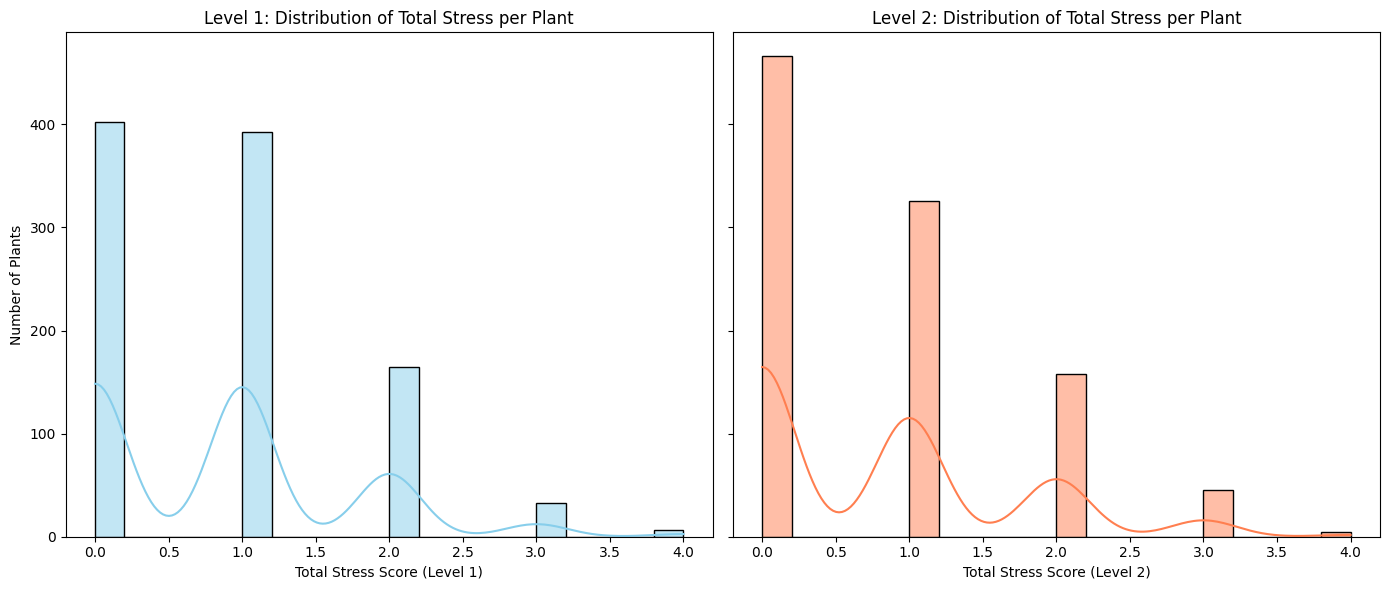

In [10]:
# 1.1. Distribution of Total stress per plant (Biotic and Abiotic groups)
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Level 1 Distribution Plot
sns.histplot(level1_df['Total_Stress_L1b'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Level 1: Distribution of Total Stress per Plant')
axes[0].set_xlabel('Total Stress Score (Level 1)')
axes[0].set_ylabel('Number of Plants')

# Level 2 Distribution Plot
sns.histplot(level2_df['Total_Stress_Score_L2'], kde=True, ax=axes[1], color='coral')
axes[1].set_title('Level 2: Distribution of Total Stress per Plant')
axes[1].set_xlabel('Total Stress Score (Level 2)')
axes[1].set_ylabel('Number of Plants')

plt.tight_layout()
plt.show()

In [66]:
level1_df.columns

Index(['Plant_ID', 'Temperature_C', 'Humidity_%', 'Soil_Moisture_%', 'Soil_pH',
       'Nutrient_Level', 'Light_Intensity_lux', 'Health_Score',
       'Health_Status', 'Soil_Moisture', 'Moisture_Stress', 'pH_Stress',
       'Light_Stress', 'Nutrient_Stress', 'Total_Stress_L1a',
       'Disease_Presence', 'Pest_Infestation', 'Abiotic_Stress_Score',
       'Biotic_Stress_Score', 'Total_Stress_L1b', 'Dominant_Stress_Type',
       'Stress_Category'],
      dtype='object')

C:\Users\baner\AppData\Local\Temp\ipykernel_22908\2459306425.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\baner\AppData\Local\Temp\ipykernel_22908\2459306425.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\baner\AppData\Local\Temp\ipykernel_22908\2459306425.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

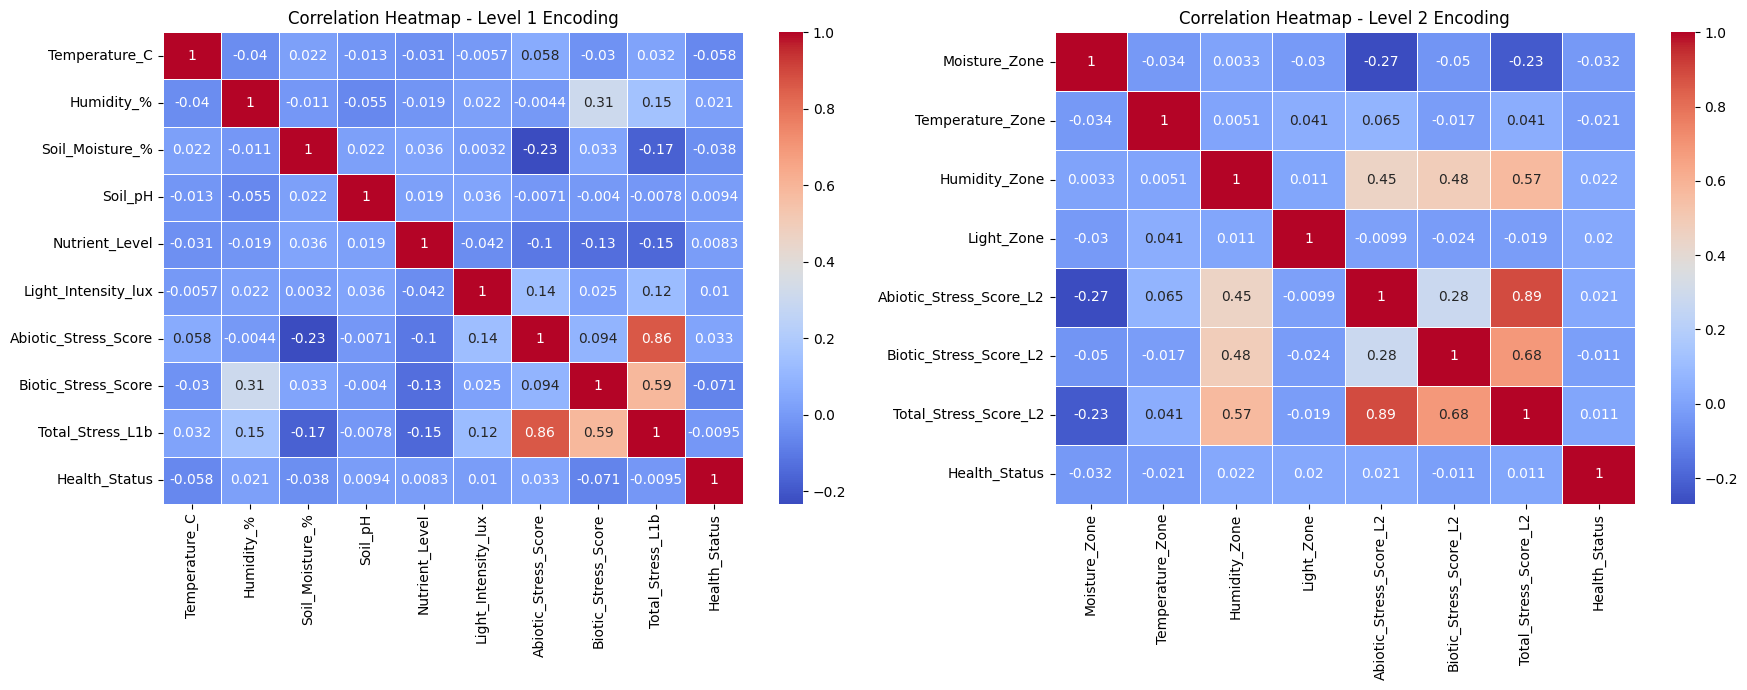

In [67]:

## 1.2 Correlation Heatmaps (Level 1 vs Level 2)
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Level 1 Heatmap
corr_level1 = level1_df[['Temperature_C', 'Humidity_%', 'Soil_Moisture_%',
                         'Soil_pH', 'Nutrient_Level', 'Light_Intensity_lux',
                         'Abiotic_Stress_Score', 'Biotic_Stress_Score', 'Total_Stress_L1b', 'Health_Status']].corr()
sns.heatmap(corr_level1, annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[0])
axes[0].set_title('Correlation Heatmap - Level 1 Encoding')

# Level 2 Heatmap
df_corr = level2_df[['Moisture_Zone', 'Temperature_Zone', 'Humidity_Zone', 'Light_Zone',
                     'Abiotic_Stress_Score_L2', 'Biotic_Stress_Score_L2', 'Total_Stress_Score_L2',
                     'Health_Status']]
for col in ['Moisture_Zone', 'Temperature_Zone', 'Humidity_Zone', 'Light_Zone']:
    df_corr[col] = df_corr[col].map({'Low':0, 'Optimal':1, 'High':2})
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[1])
axes[1].set_title('Correlation Heatmap - Level 2 Encoding')

plt.tight_layout()
plt.show()

*Key Insights*

**Level 1 Encoding (Binary Stress Flags)**
- Abiotic & Biotic Stress Scores show strong internal correlation:
    Abiotic_Stress_Score ↔ Total_Stress_L1b: 0.86  
    Biotic_Stress_Score ↔ Total_Stress_L1b: 0.59  

- Biotic Stress ↔ Humidity moderately correlated (0.31)
    This is an artifact of simulation logic.

Overall correlation with Health_Status is weak (-0.009 to -0.071)  
→ Indicates binary encoding does not effectively capture microclimatic complexity.

**Level 2 Encoding (Zone-Based Scores)**
- Strong Abiotic & Biotic ↔ Total Stress correlation maintained:
    Abiotic_Stress_Score_L2 ↔ Total_Stress_Score_L2: 0.89  
    Biotic_Stress_Score_L2 ↔ Total_Stress_Score_L2: 0.68  

- Microclimatic zones show meaningful correlation with stress scores:
    Humidity_Zone ↔ Abiotic_Stress_Score_L2: 0.45  
    Humidity_Zone ↔ Biotic_Stress_Score_L2: 0.48  
    Humidity_Zone ↔ Total_Stress_Score_L2: 0.57   
    → This reflects that Zone encoding effectively encodes stress contributions.

Correlation with Health_Status remains weak (max 0.022)
→ Plant health is influenced by multiple subtle, possibly nonlinear, 
factors not fully captured in zone-level encoding.

**Take-aways**

- Level 2 encoding reveals clear interaction patterns between stress zones and 
stress scores, validating your feature engineering choices.

- Although direct correlation to Health_Status remains weak, the structural 
relationship between microclimatic conditions and stress indicators is better 
established in Level 2.

- This validates Hypothesis 1 and 2 structurally:

    - Combined stressors correlate more strongly with Total Stress Score.

    - Zone-based encoding improves visibility of abiotic and biotic influences.

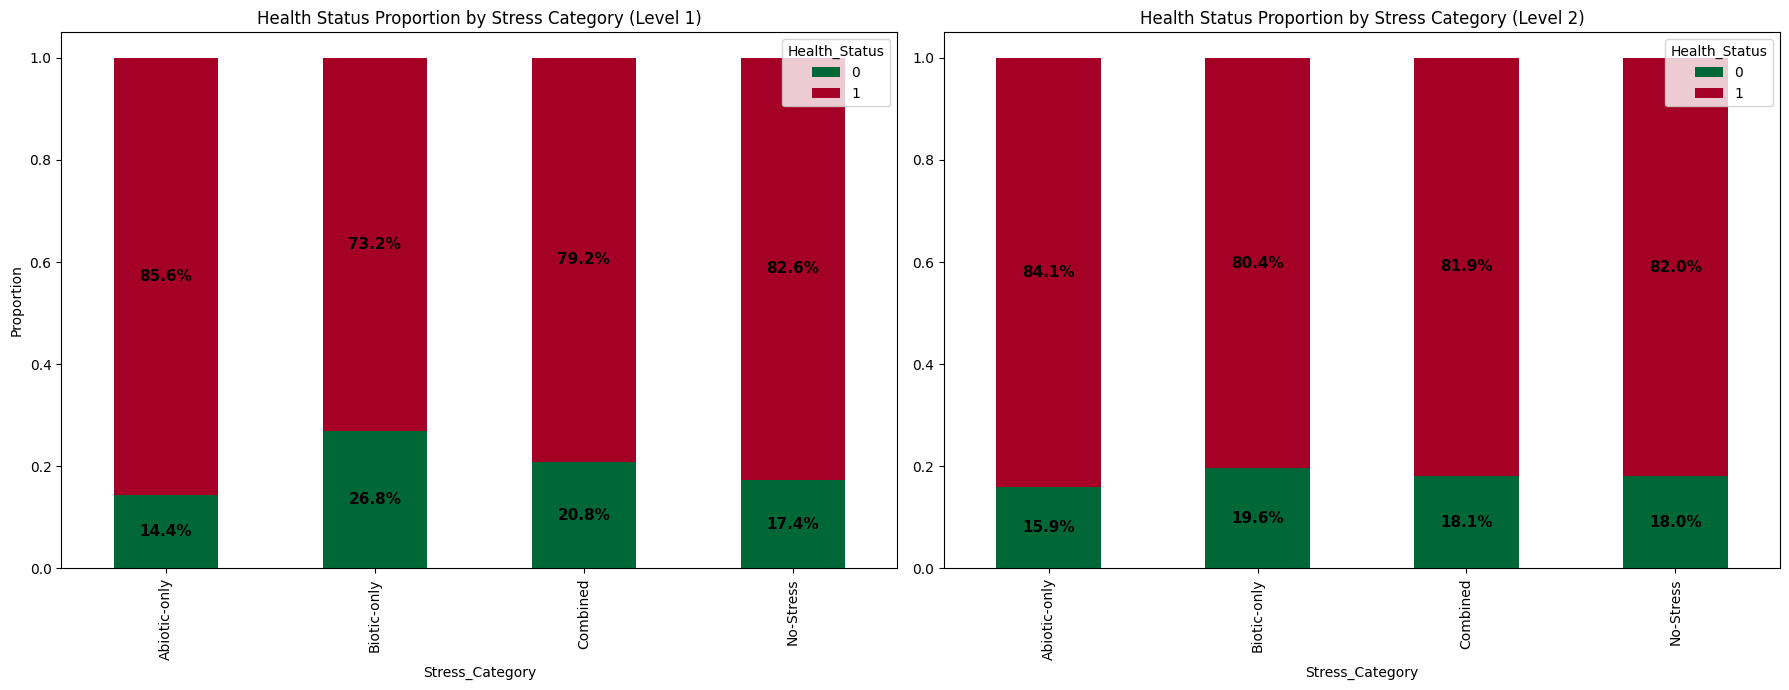

In [21]:
## 1.2 Stress Category Proportions (Level 1 vs Level 2)
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Level 1 Proportions
prop_level1 = level1_df.groupby('Stress_Category')['Health_Status'].value_counts(normalize=True).unstack()
prop_level1.plot(kind='bar', stacked=True, colormap='RdYlGn_r', ax=axes[0])
axes[0].set_title('Health Status Proportion by Stress Category (Level 1)')
axes[0].set_ylabel('Proportion')

# Level 2 Proportions
prop_level2 = level2_df.groupby('Stress_Category')['Health_Status'].value_counts(normalize=True).unstack()
prop_level2.plot(kind='bar', stacked=True, colormap='RdYlGn_r', ax=axes[1])
axes[1].set_title('Health Status Proportion by Stress Category (Level 2)')

for ax in axes:
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            x = p.get_x() + p.get_width()/2
            y = p.get_y() + height/2
            ax.annotate(f"{height*100:.1f}%", (x, y), ha='center', va='center', fontsize=11, weight='bold')

plt.tight_layout()
plt.show()

We can clearly infer from the above plots, 
Biotic stressors cause a more significant health decline compared to abiotic stressors,
thus validating Hypothesis #2

We had also observed with the tabulated mean values, that 
Plants exposed to combined abiotic and biotic stressors experience higher health risks,
for both Level 1 and 2 encoding that had validated Hypothesis #1

Next, we will visualize how how the stress category distribution changed 
after moving from Level 1 binary encoding to Level 2 zone-based encoding.

In [56]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Level 1 Counts
level1_counts = level1_df['Stress_Category'].value_counts()

# Level 2 Counts
level2_counts = level2_df['Stress_Category'].value_counts()

# Subplots
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['Level 1 Stress Category Distribution', 'Level 2 Stress Category Distribution'])

fig.add_trace(go.Pie(labels=level1_counts.index, values=level1_counts.values, name="Level 1"), row=1, col=1)
fig.add_trace(go.Pie(labels=level2_counts.index, values=level2_counts.values, name="Level 2"), row=1, col=2)

fig.update_layout(title_text="Comparison of Plant Count by Stress Category (Level 1 vs Level 2)")
fig.show()


**Shift in No-Stress Category**

- In Level 1 encoding (binary flags), ~40.2% of plants were categorized as No-Stress.

- In Level 2 encoding (zone-based), this proportion increased to 46.6%.

- *Reason:* The zone-based approach provides a more nuanced detection of optimal conditions, leading to more plants classified under no-stress conditions.

**Reduction in Biotic-only Stress**

- Level 1 encoding shows 8.2% of plants under Biotic-only stress, which reduces to 5.1% in Level 2.

- *Reason:* Biotic stress in Level 2 is influenced indirectly via zonal environmental conditions, leading to fewer cases when zone-based thresholds are applied.

**Increase in Combined Stress Category**

Combined stress category rose from 12% (Level 1) to 14.9% (Level 2).

- *Reason:* The nuanced stress detection in Level 2 reveals more overlaps where both abiotic and biotic stressors co-occur, which were possibly overlooked in binary encoding.

Slight Decrease in Abiotic-only Stress

- Abiotic-only stress reduced from 39.6% (Level 1) to 33.4% (Level 2).

- *Reason:* Zone-based encoding correctly reclassifies some abiotic stress cases into No-Stress or Combined categories based on zone thresholds.


Zonal approach seems to be a better distribution reflecting combined stress overlaps, and realistic environmental variability
- A better separation of No-stress plants
- A clearer detetcion of combined stress cases
- Reduction of overestimation of biotic only or abiotic only stresses.



---

# SECTION 2: Broader Context Visualizations

## Level 1a: Individual impact

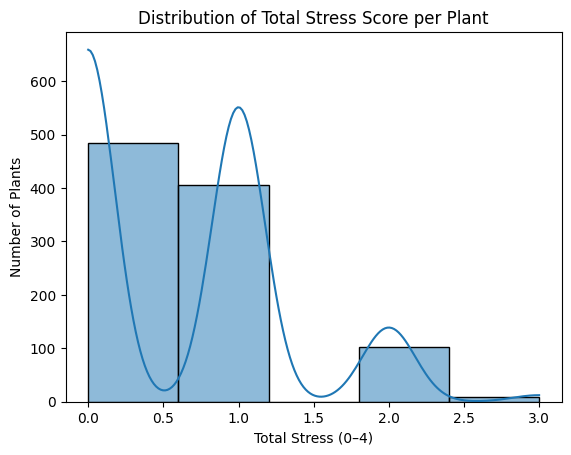

In [27]:
## 2.1. Distribution of Total Stress Score per plant

stress_cols = ["Moisture_Stress", "pH_Stress", "Light_Stress", "Nutrient_Stress"]

sns.histplot(level1_df["Total_Stress_L1a"], bins=5, kde=True)
plt.title("Distribution of Total Stress Score per Plant")
plt.xlabel("Total Stress (0–4)")
plt.ylabel("Number of Plants")
plt.show()

*Key Insights*

1. **Most plants have low stress scores**
    - A large number of plants have a score of 0 or 1
    - This indicates that majority of plants are either not stressed or only
    mildly stressed

2. **A small group of plants is under moderate to high stress (2-3)**
    - There's a visible tail with plants experiencing multiple simultaneous 
    stressors, which may need further intervention

3. **KDE suggests a bimodal pattern**
    - There’s one large peak around 0–1 (healthy or mildly stressed) and a 
    small bump around score 2.
    - Suggests two distinct populations: mostly healthy, and a small 
    vulnerable group.

In [28]:
## 2.2. Plant Count per Stress Type

# Define stress columns
stress_cols = ["Moisture_Stress", "pH_Stress", "Light_Stress", "Nutrient_Stress"]

In [29]:
# Raw data analysis
def plot_stress_summary(
    df_cleaned, stress_cols, color="skyblue", title="Plant Count per Stress Type"
):
    """
    Plots a horizontal bar chart of stress counts from the given DataFrame.

    Parameters:
    - df_cleaned: Pandas DataFrame
    - stress_cols: List of column names representing binary stress indicators (0 or 1)
    - color: Color of the bars (default: lightcoral)
    - title: Title of the plot (default: Plant Count per Stress Type)
    """
    # Step 1: Calculate stress counts
    stress_counts = {col: level1_df[col].sum() for col in stress_cols}
    print(stress_counts)

    # Step 2: Sort descending
    sorted_stress = dict(
        sorted(stress_counts.items(), key=lambda x: x[1], reverse=True)
    )
    print(sorted_stress)

    # Step 3: Plot
    plt.figure(figsize=(8, 5))
    plt.barh(list(sorted_stress.keys()), list(sorted_stress.values()), color=color)
    plt.xlabel("Number of Plants Under Stress")
    plt.title(title)
    plt.grid(axis="x", linestyle="--", alpha=0.7)

    # Step 4: Annotate bars with values
    for i, (key, value) in enumerate(sorted_stress.items()):
        plt.text(value + 2, i, str(value), va="center")

    plt.tight_layout()
    plt.show()

{'Moisture_Stress': 199, 'pH_Stress': 347, 'Light_Stress': 56, 'Nutrient_Stress': 34}
{'pH_Stress': 347, 'Moisture_Stress': 199, 'Light_Stress': 56, 'Nutrient_Stress': 34}


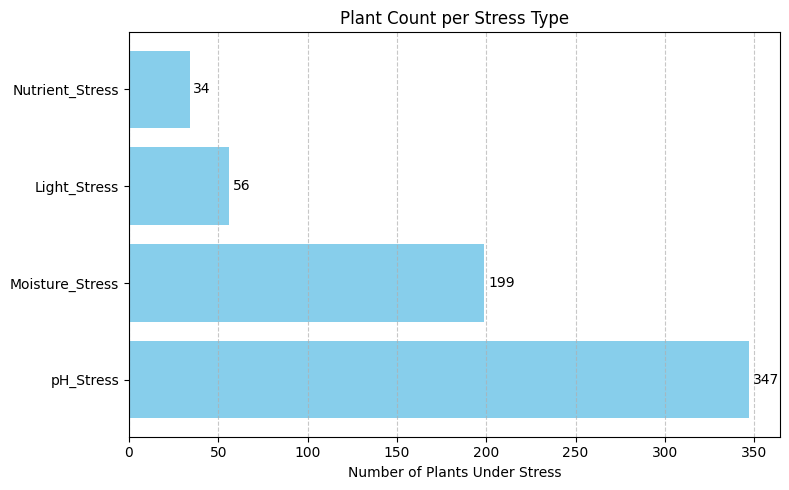

In [25]:
plot_stress_summary(level1_df, stress_cols)

## Level 1b: Grouped effect (Microclimatic, Biotic and Abiotic stressors)

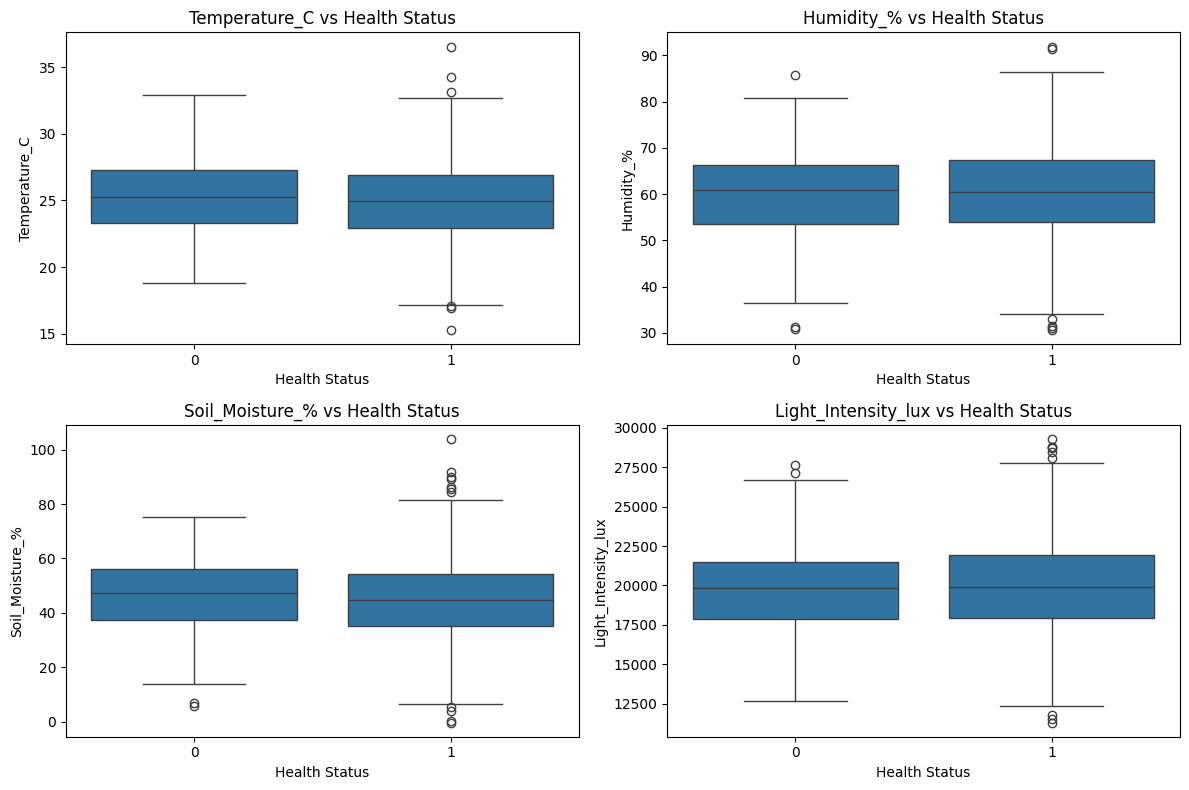

In [31]:

microclimate_vars = [
    "Temperature_C",
    "Humidity_%",
    "Soil_Moisture_%",
    "Light_Intensity_lux",
]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(microclimate_vars):
    sns.boxplot(x="Health_Status", y=col, data=level1_df, ax=axes[i])
    axes[i].set_title(f"{col} vs Health Status")
    axes[i].set_xlabel("Health Status")
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

*Key Insights*

1. Temperature does not significantly differentiate plant health 
in this dataset.

2. Healthy plants seem to tolerate a wider range of humidity.
    - The median is slightly higher for healthy plants
    - Humidity seems weakly associated with health; not a major predictor here.

3. Noticeable difference in spread observed on the effect of Soil moisture on health
    - Unhealthy plants have more extreme low moisture outliers (down to ~5–10%)
    - Low soil moisture appears linked to unhealthiness.

4. Light intensity may not have a direct impact, or the relationship is 
nonlinear (too low or too high being harmful). 
    - Both distributions are very similar in terms of median and IQR.

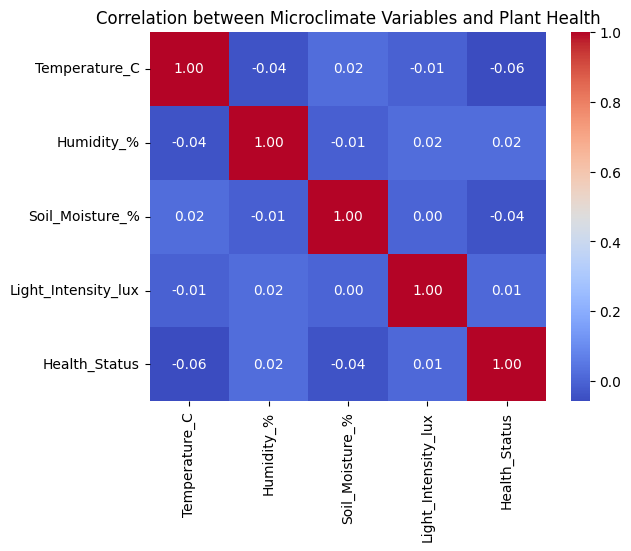

In [33]:
# Create side-by-side boxplots comparing microclimate variables across health status
cols_to_corr = microclimate_vars + ["Health_Status"]

sns.heatmap(level1_df[cols_to_corr].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Microclimate Variables and Plant Health")
plt.show()

*Key Insights*

1. **Temperature has the strongest (but still weak) correlation**
    - Negative: may hint that higher temps slightly reduce plant health, 
    but it’s not decisive

2. **Soil Moisture correlation is slightly negative**, which contradicts what we
 saw in boxplots

    - Why? Because correlation only measures linearity — perhaps it misses 
    threshold or non-linear patterns.

3. Humidity has a very weak positive correlation and light intensity has almost
no correlation.

Direct correlation only detects linear trends. Whereas Microclimatic stress
may cause nonlinear, cumulative or interaction effects (e.g. heat + dryness =
worse?)

- We will look at a deeper correlation in the Future outlook.

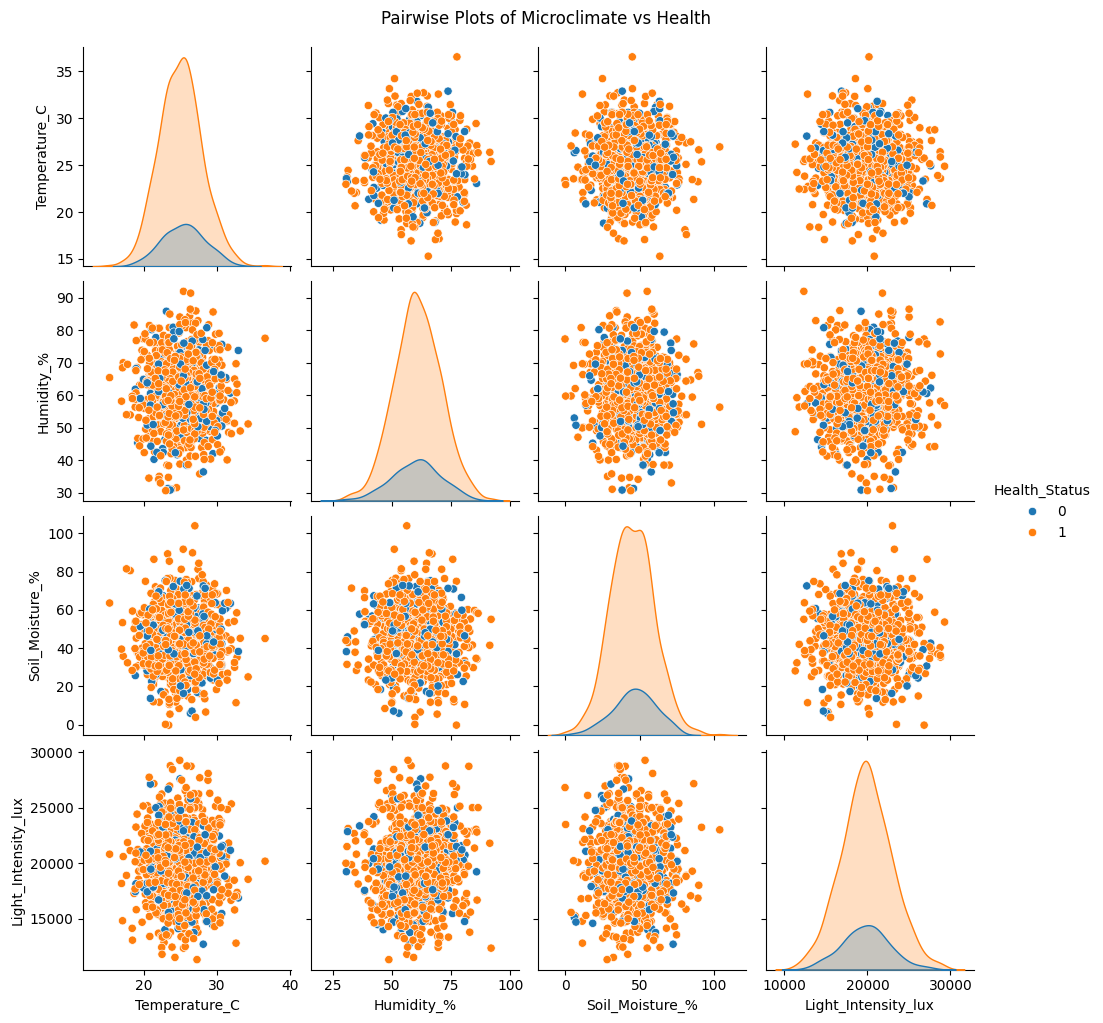

In [34]:
sns.pairplot(level1_df, vars=microclimate_vars, hue="Health_Status")
plt.suptitle("Pairwise Plots of Microclimate vs Health", y=1.02)
plt.show()

*Interpretation*

- Temperature_C
    - Healthy plants (orange) dominate the normal range (~24–30°C).
    - Unhealthy (blue) is much fewer, and clustered in cooler zones (~18–24°C).

- Humidity_%:
    - Distributions of healthy and unhealthy are very similar.

- Soil_Moisture_%
    - Again, quite similar, but unhealthy plants dip more often at 
    very low moisture.
    - **Confirms Dry soil affects plant health** in some edge cases

- Light_Intensity_lux
    - Similar distributions
    - Light alone doesn't strongly distinguish plant health.


- From most scatterplots, no strong pairwise relationship found
- Some plots like **Soil_Moisture_% vs Temperature_C may show a slight clustering**,
 but it's subtle.

Conclusion: Relationship might be **nonlinear or multi-factorial**

---

## Level 2: Zoning (Threshold-Based Binning)

Extreme light and temperature are key abiotic stressors, we can check visually if unhealthy
plants cluster at certain regions

In [64]:
import plotly.graph_objects as go

fig = px.scatter(
    level2_df,
    x='Light_Intensity_lux',
    y='Temperature_C',
    color='Health_Status',
    title='Light Intensity vs Temperature Colored by Plant Health (Level 2)',
    # labels={'Light_Intensity_lux': 'Light Intensity (lux)', 'Temperature_C': 'Temperature (°C)'},
    # opacity=0.7
    color_continuous_scale='plasma'
)

# Add annotation (You can adjust x,y ranges based on your data)
fig.add_shape(
    type="rect",
    x0=15000, x1=25000,
    y0=20, y1=30,
    line=dict(color="green", width=2),
    fillcolor="green",
    opacity=0.1,
)

fig.add_annotation(
    x=20000,
    y=31,
    text="High Healthy Cluster Zone",
    showarrow=False,
    font=dict(size=12, color="green")
)

fig.update_layout(
    xaxis_title="Light Intensity (lux)",
    yaxis_title="Temperature (°C)",
    coloraxis_colorbar=dict(title="Health_Status")
)

fig.show()

We can observe clustering in Optimal Range. Majority of healthy plants (yellow)
seem focussed in the range with light intensity: approx. 15k - 25k lux
and temperature of approx. 20 to 30 deg. Celcius; aligning with the definition of
optimal zone

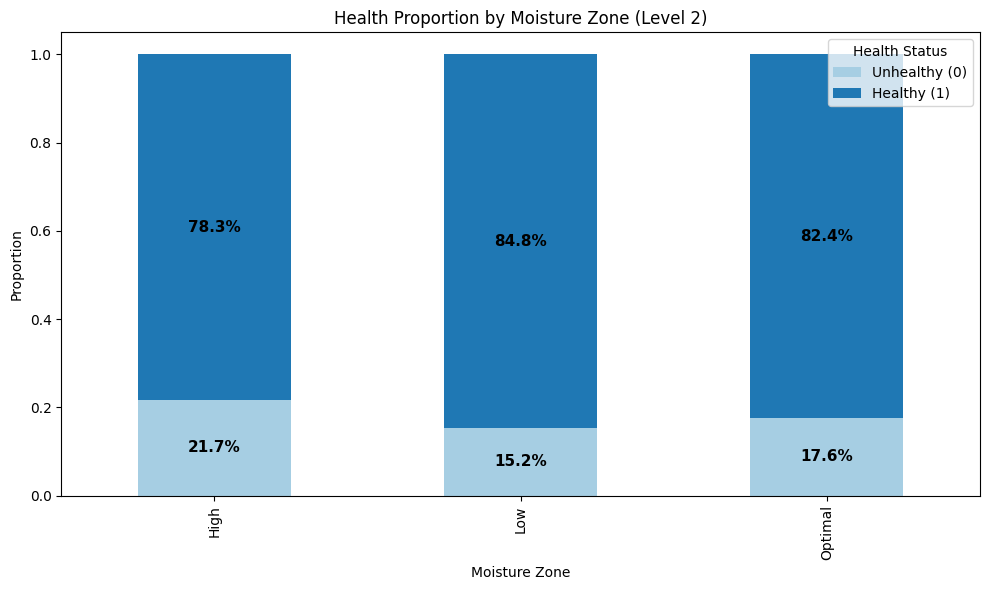

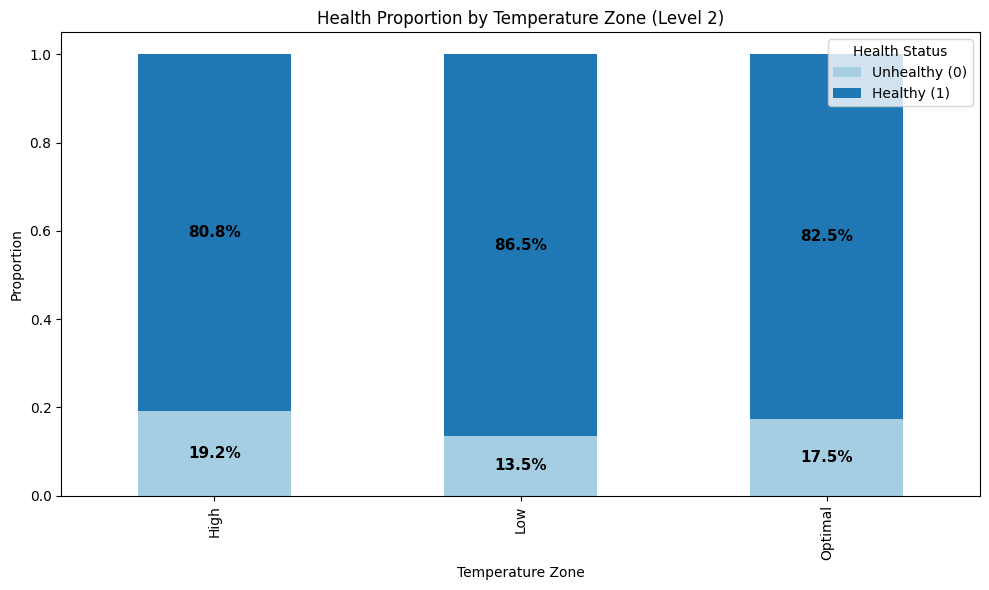

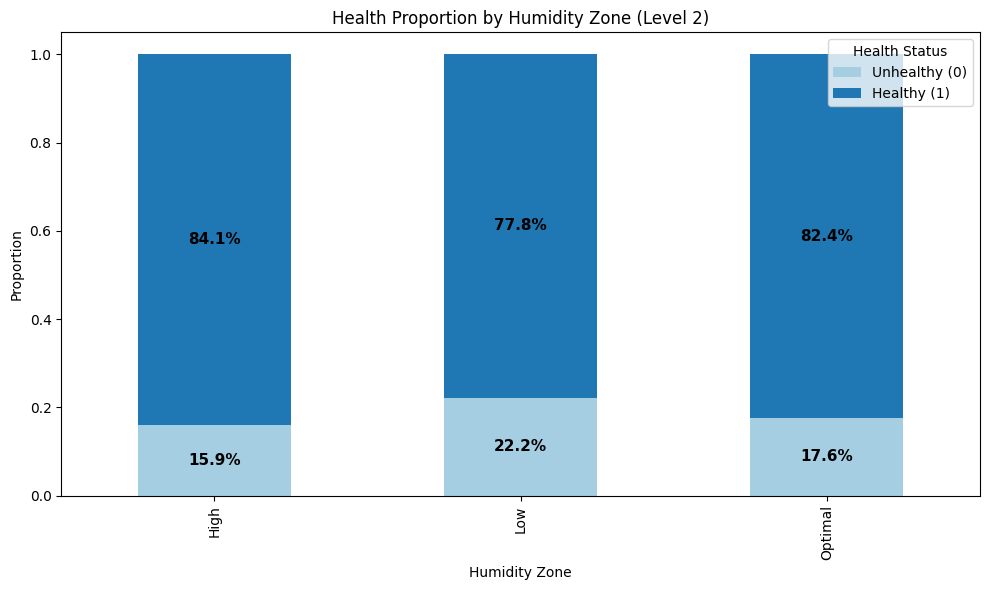

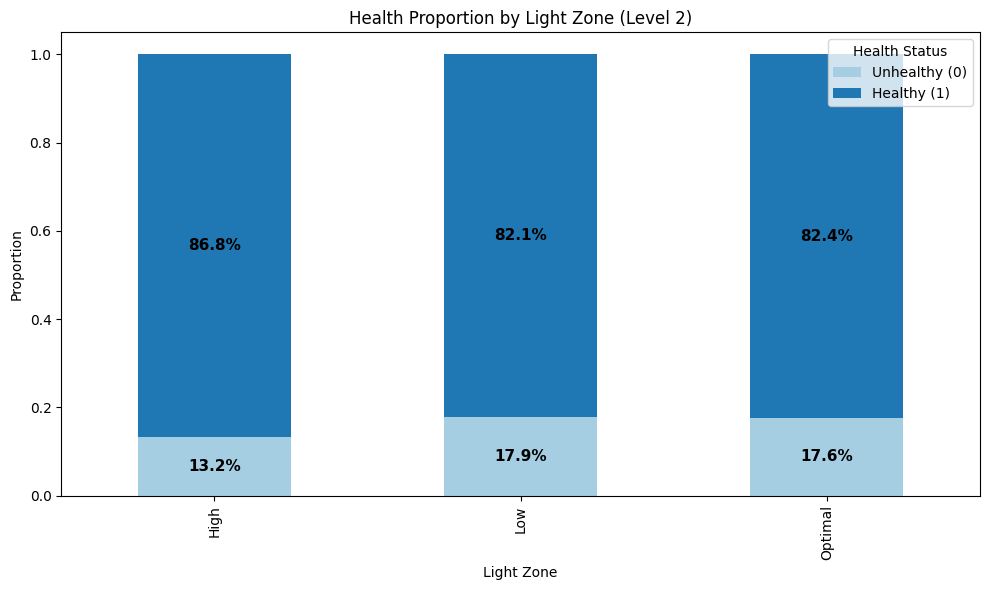

In [36]:
## 2.1 Zone-based Health Proportion Bar Plots (Level 2)
zone_cols = ['Moisture_Zone', 'Temperature_Zone', 'Humidity_Zone', 'Light_Zone']
colors = sns.color_palette('Paired')

for zone in zone_cols:
    proportions = level2_df.groupby(zone)['Health_Status'].value_counts(normalize=True).unstack()
    ax = proportions.plot(kind='bar', stacked=True, color=colors, figsize=(10,6))

    plt.title(f'Health Proportion by {zone.replace("_", " ")} (Level 2)')
    plt.ylabel('Proportion')
    plt.xlabel(zone.replace("_", " "))

    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            x = p.get_x() + p.get_width()/2
            y = p.get_y() + height/2
            ax.annotate(f"{height*100:.1f}%", (x, y), ha='center', va='center', fontsize=11, weight='bold')

    plt.legend(title='Health Status', labels=['Unhealthy (0)', 'Healthy (1)'])
    plt.tight_layout()
    plt.show()

**Hypothesis 3 stating that plants in optimal moisture, temperature and humidity
is broadly supported.** There are specific exception though, e.g. slightly better
outcomes in high light conditions reveal intersting nuances that require further 
investigation

We will also create an Interactive stacked bar for visualizing
Stress Category vs Plant health (Level2)

Note: We had created this plot using Matplotlib in ETL pipeline.

We will now visually compare across categories the stacked proportion bar plot, same as
we did with Matplotlib in ETL pipeline.

In [57]:
prop = level2_df.groupby('Stress_Category')['Health_Status'].value_counts(normalize=True).unstack().reset_index()

fig = px.bar(prop, x='Stress_Category', y=[0, 1],
             title='Interactive Health Status Proportion by Stress Category (Level 2)',
             labels={'value': 'Proportion', 'variable': 'Health Status'},
             barmode='stack')
fig.show()


From the proportions shown in the above plot, and table, we can validate that
**Biotic factors affect health significantly, re-validating Hypothesis 2**